<a href="https://colab.research.google.com/github/Mintu-Vipin/Semester3/blob/master/MintuVipinJoy_COMP257_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3**

Adriana Kelly Borges de Castro - 301113409

Mintu Vipin Joy - 301135483

**1. Retrieve and load the Olivetti** **faces dataset** 

In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces() 
print(olivetti.keys())


dict_keys(['data', 'images', 'target', 'DESCR'])


In [2]:
import matplotlib.pyplot as plt

# funtion for plotting important elements
def plotting_fig(s):
    fig=plt.figure(figsize=(10,10))
    for i in range(100):
        ax=fig.add_subplot(10,10,i+1)
        ax.imshow(s[i], plt.get_cmap('copper'))
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

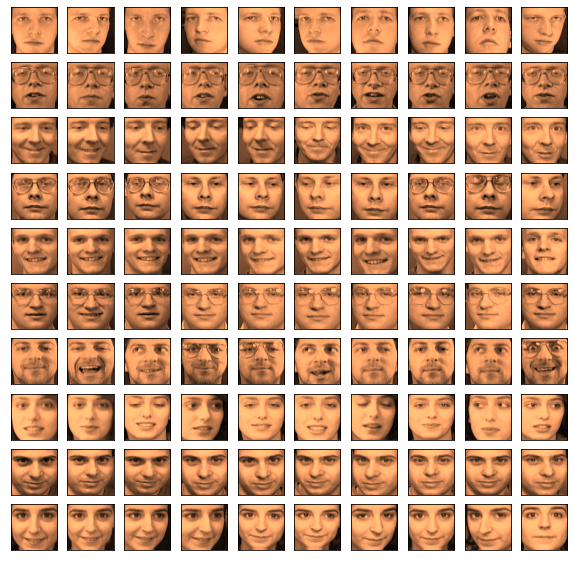

In [3]:
plotting_fig(olivetti.images)    # plotting original dataset

In [4]:
import numpy as np
import pandas as pd

# X and y data
olivetti_X, olivetti_y = olivetti.data, olivetti.target

# olivetti_X = pd.DataFrame(olivetti_X)

print(olivetti_X.shape, olivetti_y.shape)
# print(olivetti)
# print(olivetti_X)
# print(olivetti_y)

# Unique values of olivetti_y
print(np.unique(olivetti_y))

(400, 4096) (400,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [5]:
#standardising the data
from sklearn.preprocessing import StandardScaler

standardscalar = StandardScaler()
olivetti_X = standardscalar.fit_transform(olivetti_X)

In [6]:
# Normalize the data 
from sklearn.preprocessing import normalize

olivetti_X = normalize(olivetti_X)
# olivetti_X = pd.DataFrame(olivetti_X)


**2. Split the training set, a validation set, and a test set using stratified sampling to ensure that there are the same number of images per person in each set.**

In [7]:
from sklearn.model_selection import train_test_split
from collections import Counter

# split into train, test sets
olivetti_X_train, olivetti_X_test, olivetti_y_train, olivetti_y_test = train_test_split(olivetti_X, olivetti_y, test_size=0.30, random_state=83, stratify=olivetti_y)

print(olivetti_X_train.shape, olivetti_X_test.shape, olivetti_y_train.shape, olivetti_y_test.shape)
print(Counter(olivetti_y_train))
print(Counter(olivetti_y_test))


# split into test, validation sets
olivetti_X_test, olivetti_X_val, olivetti_y_test, olivetti_y_val = train_test_split(olivetti_X_test, olivetti_y_test, test_size=0.5, random_state=83, stratify=olivetti_y_test)

print('\n\n')
print(olivetti_X_train.shape, olivetti_X_val.shape, olivetti_y_train.shape, olivetti_y_val.shape)
print(Counter(olivetti_y_train))
print(Counter(olivetti_y_val))

(280, 4096) (120, 4096) (280,) (120,)
Counter({27: 7, 36: 7, 10: 7, 4: 7, 19: 7, 29: 7, 32: 7, 38: 7, 6: 7, 26: 7, 34: 7, 31: 7, 28: 7, 16: 7, 24: 7, 39: 7, 23: 7, 12: 7, 33: 7, 21: 7, 1: 7, 11: 7, 13: 7, 18: 7, 8: 7, 15: 7, 17: 7, 30: 7, 7: 7, 3: 7, 14: 7, 20: 7, 37: 7, 35: 7, 0: 7, 5: 7, 25: 7, 9: 7, 22: 7, 2: 7})
Counter({12: 3, 23: 3, 18: 3, 15: 3, 37: 3, 10: 3, 29: 3, 13: 3, 11: 3, 6: 3, 35: 3, 28: 3, 39: 3, 16: 3, 19: 3, 24: 3, 33: 3, 5: 3, 8: 3, 17: 3, 20: 3, 25: 3, 32: 3, 36: 3, 0: 3, 30: 3, 1: 3, 14: 3, 27: 3, 2: 3, 34: 3, 21: 3, 26: 3, 38: 3, 9: 3, 3: 3, 4: 3, 7: 3, 22: 3, 31: 3})



(280, 4096) (60, 4096) (280,) (60,)
Counter({27: 7, 36: 7, 10: 7, 4: 7, 19: 7, 29: 7, 32: 7, 38: 7, 6: 7, 26: 7, 34: 7, 31: 7, 28: 7, 16: 7, 24: 7, 39: 7, 23: 7, 12: 7, 33: 7, 21: 7, 1: 7, 11: 7, 13: 7, 18: 7, 8: 7, 15: 7, 17: 7, 30: 7, 7: 7, 3: 7, 14: 7, 20: 7, 37: 7, 35: 7, 0: 7, 5: 7, 25: 7, 9: 7, 22: 7, 2: 7})
Counter({37: 2, 4: 2, 29: 2, 18: 2, 0: 2, 16: 2, 38: 2, 30: 2, 23: 2, 5: 2, 22: 2, 

**3. Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set**

In [8]:
# evaluate a SVM model using k-fold cross-validation

import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
olivetti_model = SVC()

# Fit the model
olivetti_model.fit(olivetti_X_train,olivetti_y_train)

# prepare the cross-validation procedure
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(olivetti_model,olivetti_X_train,olivetti_y_train,cv=cv, scoring="accuracy")
print("Accuracy Score Mean: ",scores.mean())

#validating using validation data
y_pred = olivetti_model.predict(olivetti_X_val)

# Print Metrics
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score,confusion_matrix

print("Accuracy Score:    ",accuracy_score(olivetti_y_val,y_pred))
print("Precision Score:   ",precision_score(olivetti_y_val,y_pred,average='weighted'))
print("Recall Score:      ",recall_score(olivetti_y_val,y_pred,average='weighted'))
print("F1 Score:          ",f1_score(olivetti_y_val, y_pred,average='weighted'))
print("Confusion Matrix:  \n",confusion_matrix(olivetti_y_val,y_pred))


Accuracy Score Mean:  0.8035714285714285
Accuracy Score:     0.9166666666666666
Precision Score:    0.9188888888888889
Recall Score:       0.9166666666666666
F1 Score:           0.9068253968253968
Confusion Matrix:  
 [[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [9]:
# plotting the predicted values along with true values
def plot_gallery(images,titles,h,w,row=5,col=11):
    plt.figure(figsize=(1.4*col,2*row))
    plt.subplots_adjust(bottom=0,left=0.1,right=.99,top=0.80,hspace=.35)
    for i in range(55):
        plt.subplot(row,col,i+1)
        plt.imshow(images[i].reshape((64,64)),cmap=plt.cm.bone)
        plt.title(titles[i],size=12)
        plt.xticks([])
        plt.yticks([])
def title(y_pred,olivetti_y_val,i):
    return 'predicted: %s\n true: %s'%(y_pred[i],olivetti_y_val[i])

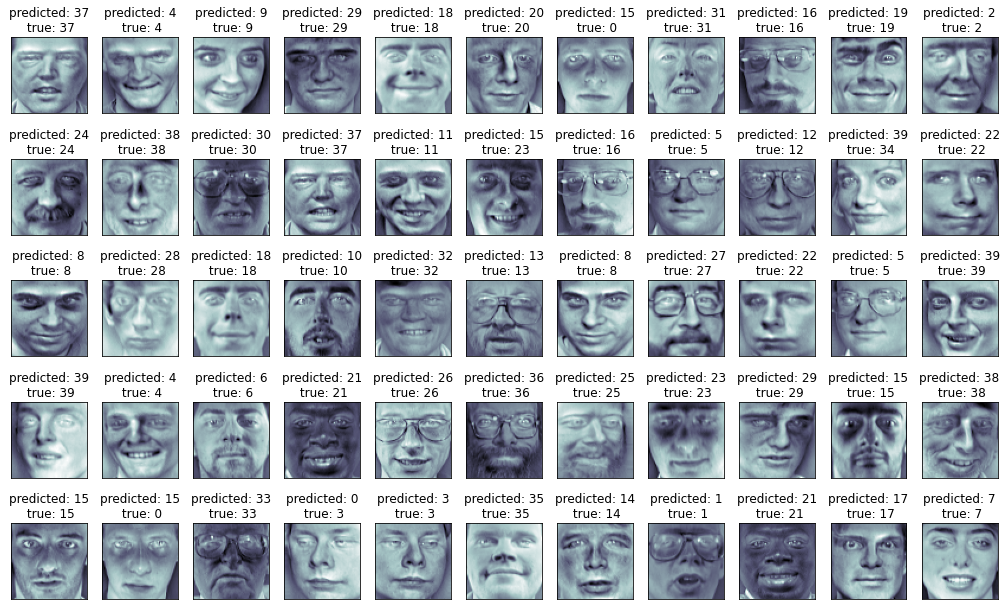

In [10]:
# showing comparison of actual values with predicted ones
prediction = [title(y_pred,olivetti_y_val,i) for i in range(y_pred.shape[0])]
plot_gallery(olivetti_X_val,prediction, 64, 64 )

**4. Using either Agglomerative Hierarchical Clustering (AHC) or Divisive Hierarchical Clustering (DHC) and using the centroid-based clustering rule, reduce the dimensionality of the set by using the following similarity measures:**

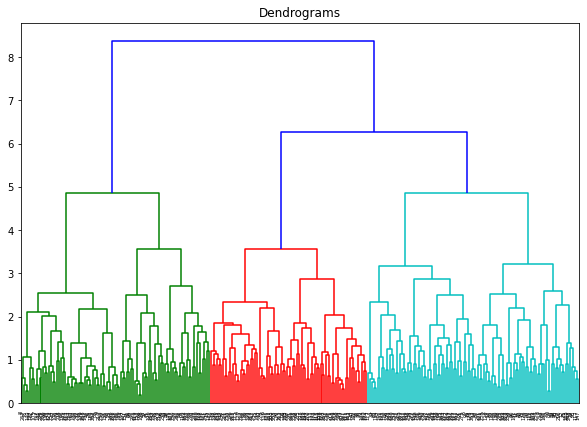

In [11]:
# draw the dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(olivetti_X_train, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. If we draw a horizontal line that passes through longest distance without a horizontal line, we get 3 clusters as shown in the following figure:

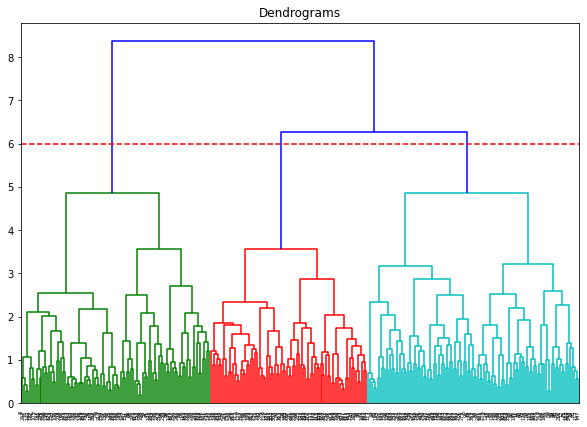

In [12]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(olivetti_X_train, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [13]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(olivetti_X_train)
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['P1', 'P2']

We have 3 clusters as this line cuts the dendrogram at 3 points. Let’s now apply hierarchical clustering for 3 clusters:

**a) Euclidean Distance**

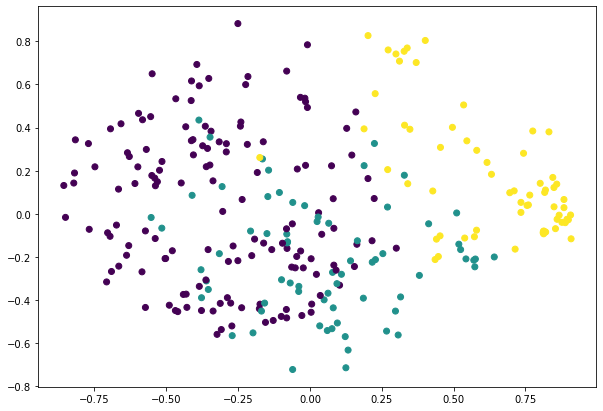

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster_euclidean = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
y_minkowski = cluster_euclidean.fit_predict(olivetti_X_train)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca['P1'], X_pca['P2'], c=cluster_euclidean.labels_)

In [15]:
cluster_euclidean.labels_

array([0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1,
       0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0,
       0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 2,
       0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0])

**b) Minkowski Distance**

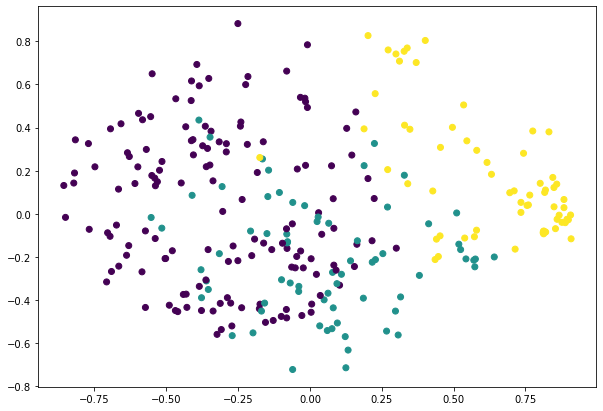

In [17]:
cluster_minkowski = AgglomerativeClustering(n_clusters=3, affinity='minkowski', linkage='complete')
y_minkowski = cluster_minkowski.fit_predict(olivetti_X_train)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca['P1'], X_pca['P2'], c=cluster_minkowski.labels_)

In [18]:
cluster_minkowski.labels_

array([0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1,
       0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0,
       0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 2,
       0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0])

**c) Cosine Similarity**

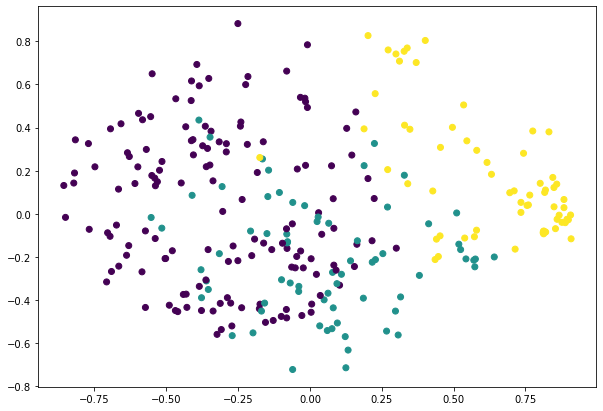

In [19]:
cluster_cosine = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')
y_cosine = cluster_cosine.fit_predict(olivetti_X_train)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca['P1'], X_pca['P2'], c=cluster_cosine.labels_)

In [20]:
cluster_cosine.labels_

array([0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1,
       0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0,
       0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 2,
       0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0])

**5. Silhouette score approach to choose the number of clusters for a) Euclidean Distance b) Minkowski Distance c) Cosine Similarity**

Silhouette score approach to choose the number of clusters for a) Euclidean Distance

For n_clusters = 2 The average silhouette_score is : 0.122124076
For n_clusters = 3 The average silhouette_score is : 0.09757902
For n_clusters = 4 The average silhouette_score is : 0.10198521
For n_clusters = 5 The average silhouette_score is : 0.10338357
For n_clusters = 6 The average silhouette_score is : 0.10305767


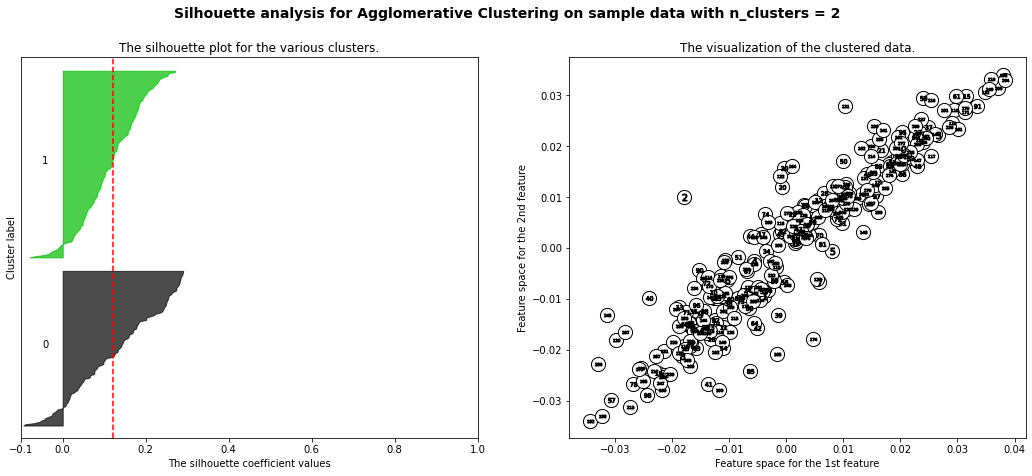

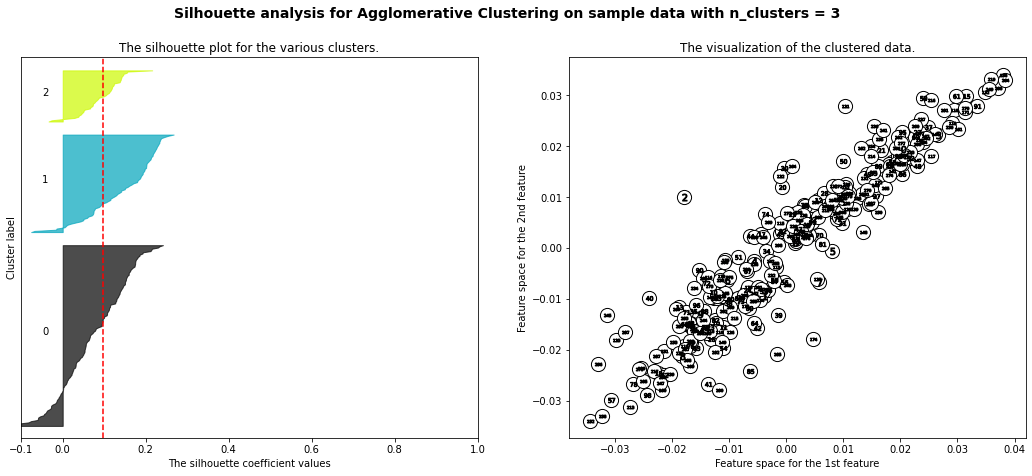

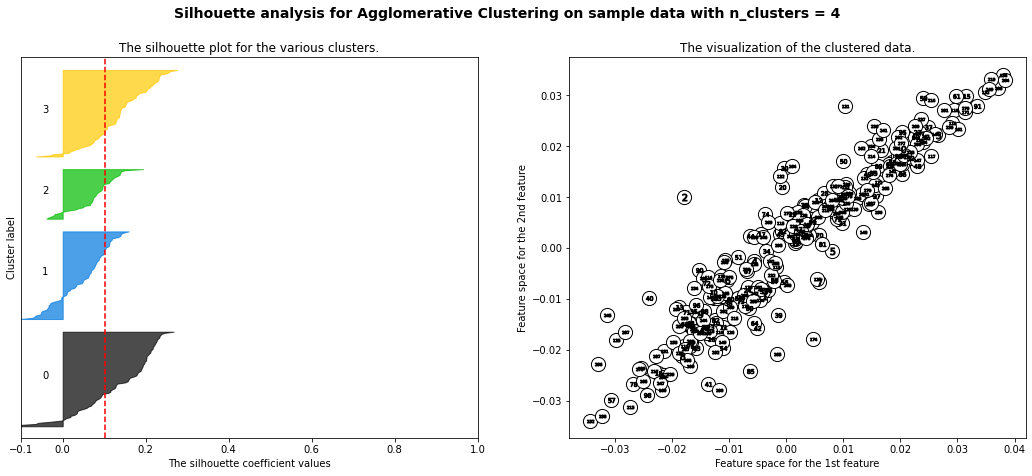

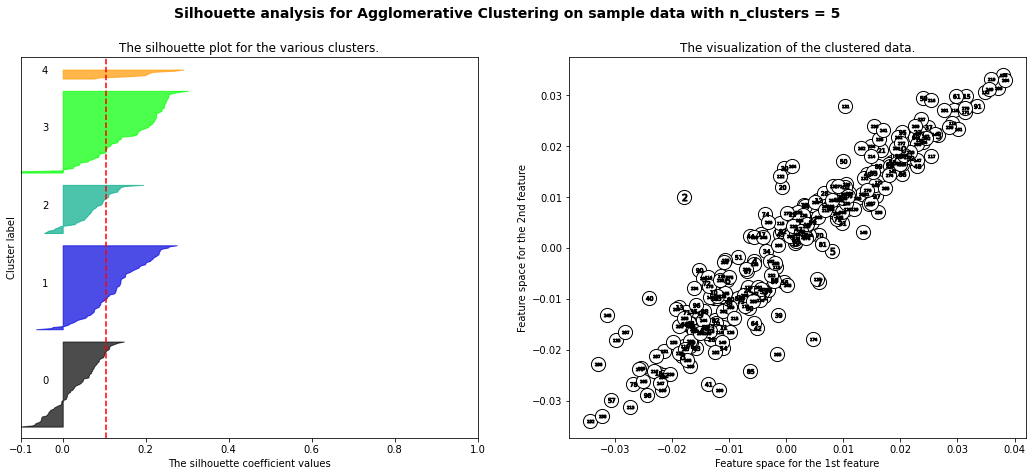

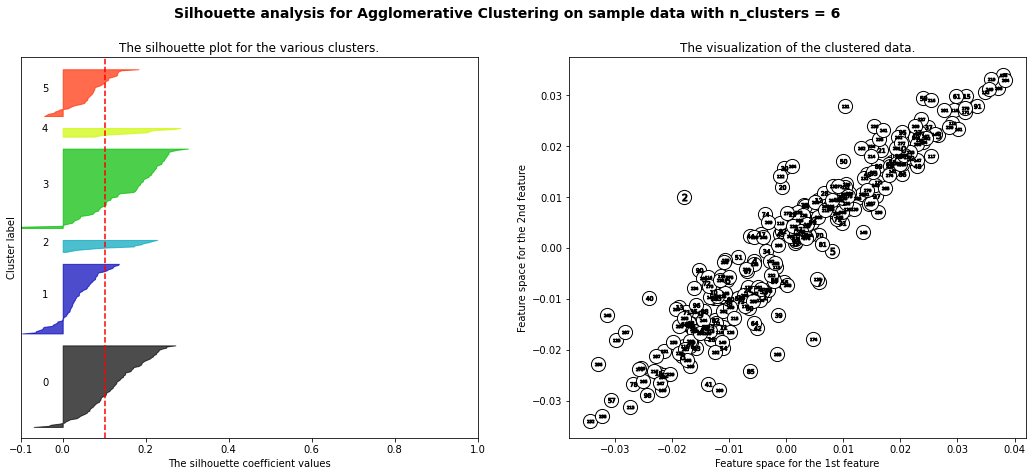

In [21]:
#Dimentionality reduction using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(olivetti_X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    
    cluster_euclidean = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
    cluster_labels = cluster_euclidean.fit_predict(olivetti_X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(olivetti_X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(olivetti_X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(olivetti_X_train[:, 0], olivetti_X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Draw white circles at cluster centers
    ax2.scatter(olivetti_X_train[:, 0], olivetti_X_train[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    

    for i, c in enumerate(olivetti_X_train):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Agglomerative Clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score approach to choose the number of clusters for b) Minkowski Distance

For n_clusters = 2 The average silhouette_score is : 0.1104967
For n_clusters = 3 The average silhouette_score is : 0.10370162
For n_clusters = 4 The average silhouette_score is : 0.0845629
For n_clusters = 5 The average silhouette_score is : 0.06733598
For n_clusters = 6 The average silhouette_score is : 0.07363089


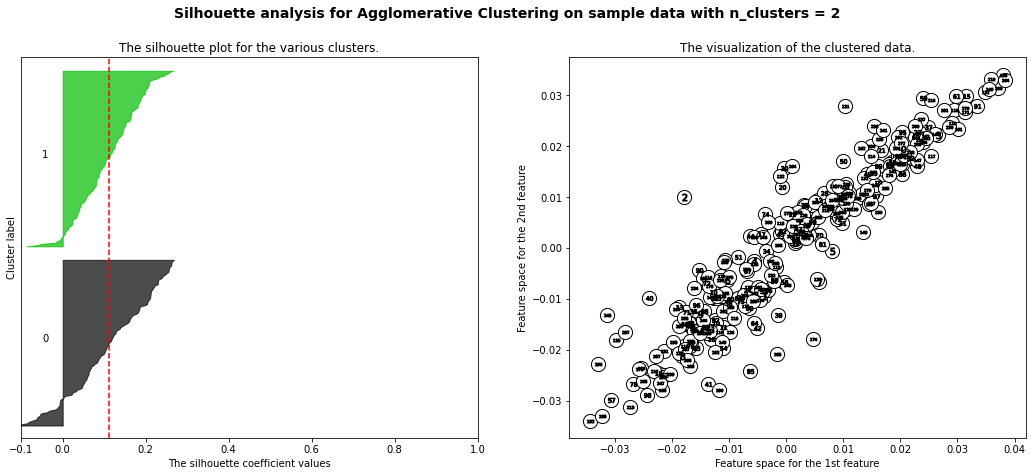

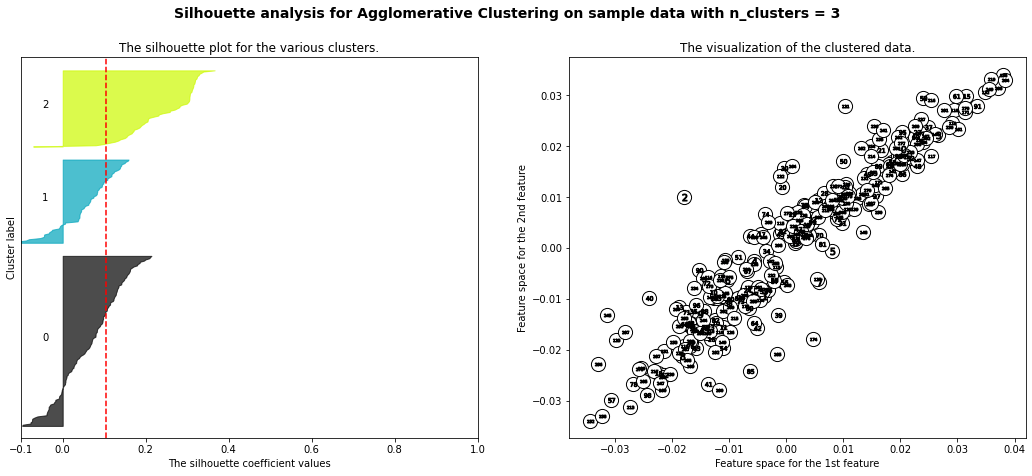

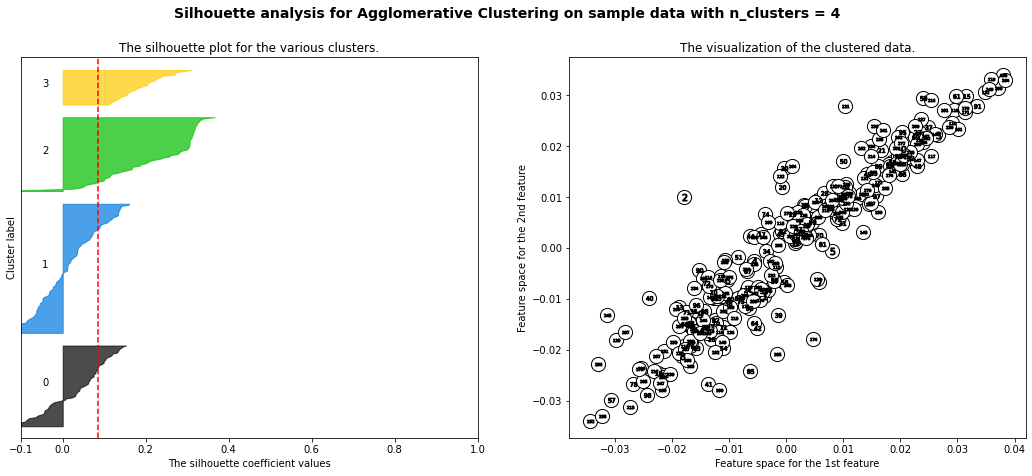

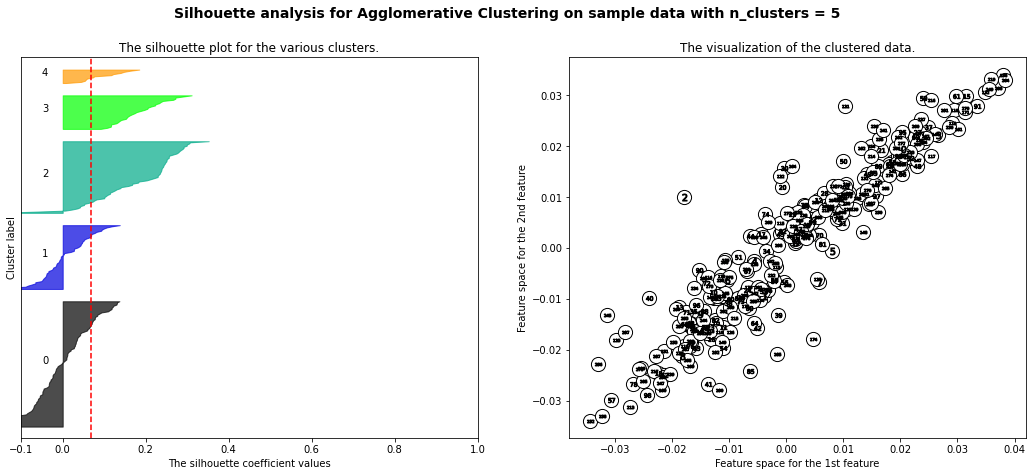

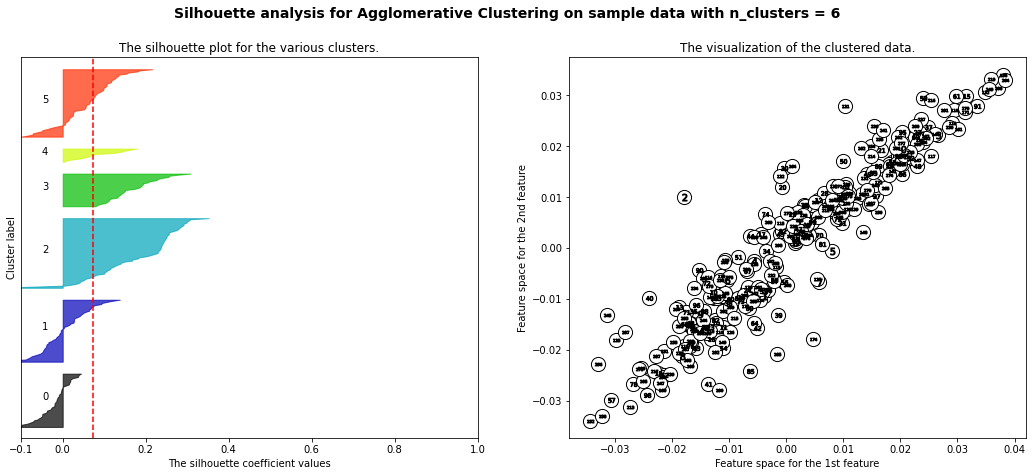

In [22]:
#Dimentionality reduction using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(olivetti_X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    
    cluster_minkowski= AgglomerativeClustering(n_clusters=n_clusters, affinity='minkowski', linkage='complete')
    cluster_labels = cluster_minkowski.fit_predict(olivetti_X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(olivetti_X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(olivetti_X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(olivetti_X_train[:, 0], olivetti_X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Draw white circles at cluster centers
    ax2.scatter(olivetti_X_train[:, 0], olivetti_X_train[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(olivetti_X_train):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Agglomerative Clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score approach to choose the number of clusters for c) Cosine Similarity

For n_clusters = 2 The average silhouette_score is : 0.122124076
For n_clusters = 3 The average silhouette_score is : 0.09757902
For n_clusters = 4 The average silhouette_score is : 0.09889416
For n_clusters = 5 The average silhouette_score is : 0.10065011
For n_clusters = 6 The average silhouette_score is : 0.101506524


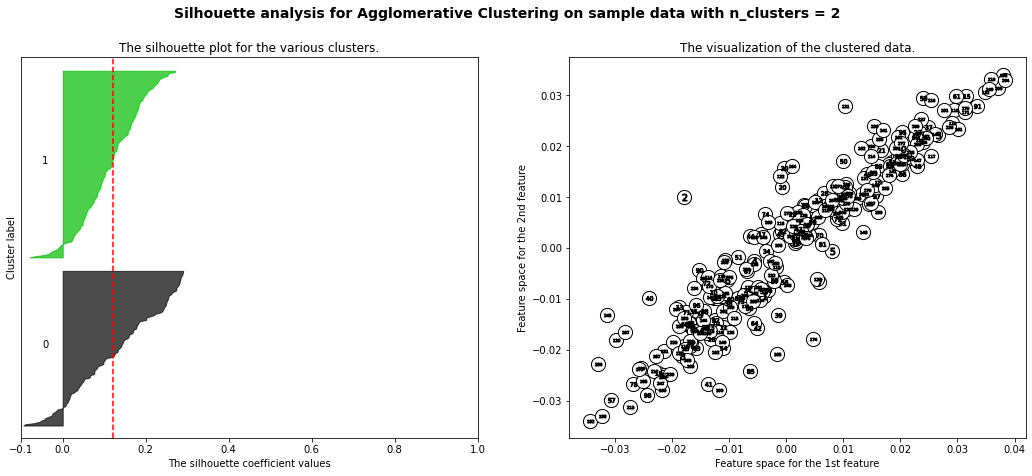

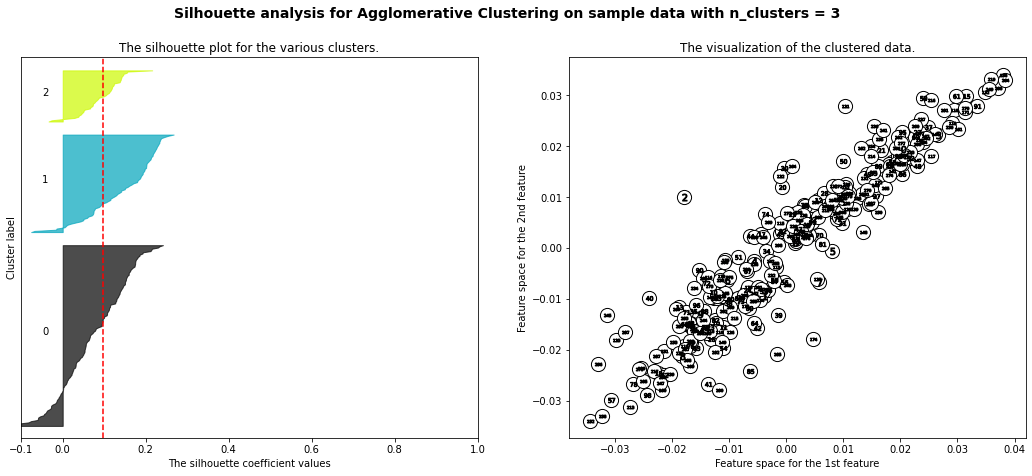

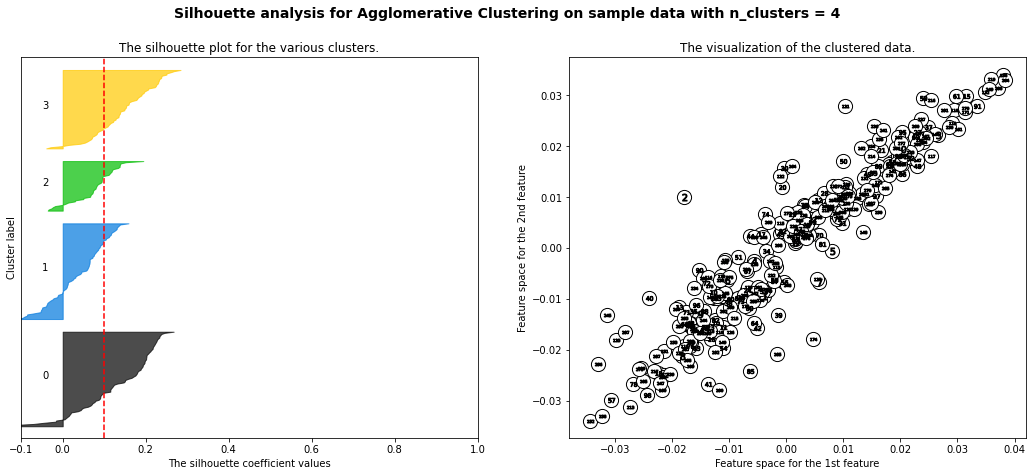

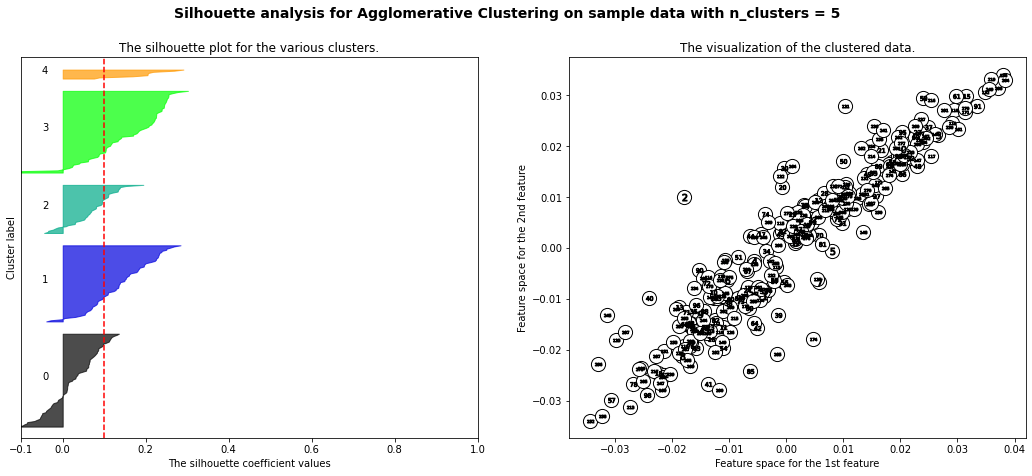

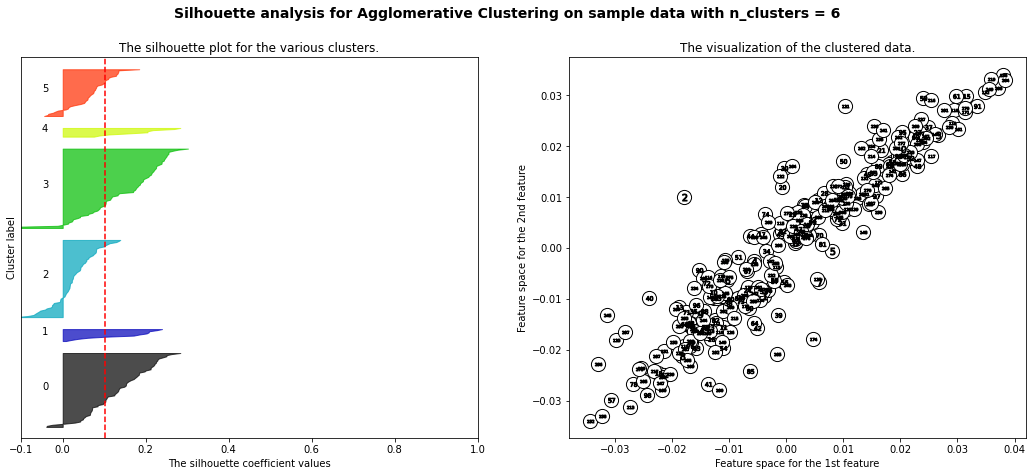

In [23]:
#Dimentionality reduction using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(olivetti_X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    
    cluster_cosine= AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage='average')
    cluster_labels = cluster_cosine.fit_predict(olivetti_X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(olivetti_X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(olivetti_X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(olivetti_X_train[:, 0], olivetti_X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Draw white circles at cluster centers
    ax2.scatter(olivetti_X_train[:, 0], olivetti_X_train[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(olivetti_X_train):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Agglomerative Clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**6. Use the set from (4(a), 4(b), or 4(c)) to train a classifier as in (3) using k-fold cross validation**

Using Set from 4a)

In [24]:
#using k=5
agg_clusterer = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
olivetti_y_train_euc = agg_clusterer.fit_predict(olivetti_X_train)
olivetti_y_val_euc = agg_clusterer.fit_predict(olivetti_X_val)

# evaluate a SVM model using k-fold cross-validation

from sklearn.svm import SVC
olivetti_model_euclidean = SVC()

# Fit the model
olivetti_model_euclidean.fit(olivetti_X_train,olivetti_y_train_euc)

#validating using validation data
y_pred_euc = olivetti_model_euclidean.predict(olivetti_X_val)

# prepare the cross-validation procedure
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(olivetti_model_euclidean,olivetti_X_train,olivetti_y_train_euc,cv=cv, scoring="accuracy")
print("\nMean Accuracy Score: ",scores.mean())


# Print Metrics
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score,confusion_matrix

print("\nEuclidean\n-------------\n")
print("Accuracy Score:    ",accuracy_score(olivetti_y_val_euc,y_pred_euc))
print("Precision Score:   ",precision_score(olivetti_y_val_euc,y_pred_euc,average='weighted'))
print("Recall Score:      ",recall_score(olivetti_y_val_euc,y_pred_euc,average='weighted'))
print("F1 Score:          ",f1_score(olivetti_y_val_euc, y_pred_euc,average='weighted'))
print("Confusion Matrix:  \n",confusion_matrix(olivetti_y_val_euc,y_pred_euc))



Mean Accuracy Score:  0.9535714285714285

Euclidean
-------------

Accuracy Score:     0.23333333333333334
Precision Score:    0.2163794903926483
Recall Score:       0.23333333333333334
F1 Score:           0.217380526667883
Confusion Matrix:  
 [[ 9  6  0  0  0]
 [ 0  2  0  2  2]
 [ 0 11  1  0  0]
 [ 5  0  4  2  0]
 [ 0  0  4 12  0]]


Using Set from 4b)

In [25]:
#using k=5
agg_clusterer = AgglomerativeClustering(n_clusters=5, affinity='minkowski', linkage='average')
olivetti_y_train_min = agg_clusterer.fit_predict(olivetti_X_train)
olivetti_y_val_min = agg_clusterer.fit_predict(olivetti_X_val)

# evaluate a SVM model using k-fold cross-validation

from sklearn.svm import SVC
olivetti_model_minkowski = SVC()

# Fit the model
olivetti_model_minkowski.fit(olivetti_X_train,olivetti_y_train_min)

#validating using validation data
y_pred_min = olivetti_model_minkowski.predict(olivetti_X_val)

# prepare the cross-validation procedure
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(olivetti_model_minkowski,olivetti_X_train,olivetti_y_train_min,cv=cv, scoring="accuracy")
print("\nMean Accuracy Score: ",scores.mean())


# Print Metrics
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score,confusion_matrix

print("\nMinkowski\n-------------\n")
print("Accuracy Score:    ",accuracy_score(olivetti_y_val_min,y_pred_min))
print("Precision Score:   ",precision_score(olivetti_y_val_min,y_pred_min,average='weighted'))
print("Recall Score:      ",recall_score(olivetti_y_val_min,y_pred_min,average='weighted'))
print("F1 Score:          ",f1_score(olivetti_y_val_min, y_pred_min,average='weighted'))
print("Confusion Matrix:  \n",confusion_matrix(olivetti_y_val_min,y_pred_min))



Mean Accuracy Score:  0.9535714285714285

Minkowski
-------------

Accuracy Score:     0.23333333333333334
Precision Score:    0.2163794903926483
Recall Score:       0.23333333333333334
F1 Score:           0.217380526667883
Confusion Matrix:  
 [[ 9  6  0  0  0]
 [ 0  2  0  2  2]
 [ 0 11  1  0  0]
 [ 5  0  4  2  0]
 [ 0  0  4 12  0]]


Using Set from 4c)

In [26]:
#using k=5
agg_clusterer = AgglomerativeClustering(n_clusters=5, affinity='cosine', linkage='average')
olivetti_y_train_cos = agg_clusterer.fit_predict(olivetti_X_train)
olivetti_y_val_cos = agg_clusterer.fit_predict(olivetti_X_val)

# evaluate a SVM model using k-fold cross-validation

from sklearn.svm import SVC
olivetti_model_cosine = SVC()

# Fit the model
olivetti_model_cosine.fit(olivetti_X_train,olivetti_y_train_cos)

#validating using validation data
y_pred_cos = olivetti_model_cosine.predict(olivetti_X_val)

# prepare the cross-validation procedure
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(olivetti_model_cosine,olivetti_X_train,olivetti_y_train_cos,cv=cv, scoring="accuracy")
print("\nMean Accuracy Score: ",scores.mean())


# Print Metrics
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score,confusion_matrix

print("\nCosine\n-------------\n")
print("Accuracy Score:    ",accuracy_score(olivetti_y_val_cos,y_pred_cos))
print("Precision Score:   ",precision_score(olivetti_y_val_cos,y_pred_cos,average='weighted'))
print("Recall Score:      ",recall_score(olivetti_y_val_cos,y_pred_cos,average='weighted'))
print("F1 Score:          ",f1_score(olivetti_y_val_cos, y_pred_cos,average='weighted'))
print("Confusion Matrix:  \n",confusion_matrix(olivetti_y_val_cos,y_pred_cos))



Mean Accuracy Score:  0.9428571428571428

Cosine
-------------

Accuracy Score:     0.25
Precision Score:    0.22291666666666668
Recall Score:       0.25
F1 Score:           0.22954144620811287
Confusion Matrix:  
 [[10  5  0  0  0]
 [ 0  2  0  2  2]
 [ 0 11  1  0  0]
 [ 5  0  4  2  0]
 [ 0  0  4 12  0]]
